891245


/var/folders/z9/0b_f0vqx7yz487m29qrdk82w0000gn/T/ipykernel_13676/3621528740.py:45: RuntimeWarning: invalid value encountered in tan
  xptar = np.tan(ptarth)


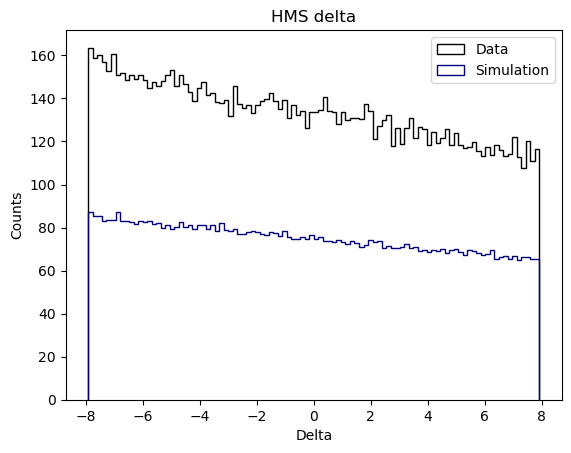

In [2]:
import scipy.interpolate
from scipy.interpolate import LinearNDInterpolator, CloughTocher2DInterpolator
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy 

simroot = uproot.open("/Users/juliogutierrez/Downloads/R-sidis_analysis/ROOTfiles/hms_29p05deg_1p531_lh2_rsidis.root")
# simroot = uproot.open("/Users/juliogutierrez/Downloads/hms_29p05deg_1p531gev_hyd_rsidis.root")
dataroot = uproot.open("/Users/juliogutierrez/Downloads/R-sidis_analysis/ROOTfiles/hms_coin_replay_production_24136_-1.root")


simtree = simroot["h10"]
tree = dataroot["T"]

psdelta = simtree["hsdelta"].array(library="np")
stop_id = simtree["stop_id"].array(library="np")
psytar = simtree["hsytar"].array(library="np")
psxptar = simtree["hsxptar"].array(library="np")
psyptar = simtree["hsyptar"].array(library="np")
sxpfp = simtree["hsxpfp"].array(library="np")
psypfp = simtree["hsypfp"].array(library="np")
sweights = simtree["weight"].array(library="np")

ptardp = tree["H.gtr.dp"].array(library="np")
xtar = tree["H.gtr.x"].array(library="np")
ytar = tree["H.gtr.y"].array(library="np")
ptarth = tree["H.gtr.th"].array(library="np")
ptarph = tree["H.gtr.ph"].array(library="np")
hmsCal = tree["H.cal.etottracknorm"].array(library="np")
xfp = tree["H.dc.x_fp"].array(library="np")
yfp = tree["H.dc.y_fp"].array(library="np")
xpfp = tree["H.dc.xp_fp"].array(library="np")
ypfp = tree["H.dc.yp_fp"].array(library="np")
Qtree = tree["H.kin.Q2"].array(library="np")
cer = tree["H.cer.npeSum"].array(library="np")

charge = 10.486769 # mC
normfac = 6.4670859482710652
# normfac = 6.47
hms_eff = 0.9986

xptar = np.tan(ptarth)
yptar = np.tan(ptarph)


nentries = len(psdelta)
nentries_data = len(ptardp)
print(nentries_data)


cuts_sim = (psdelta > -8) & (psdelta < 8) & (stop_id==0)
cuts_data = (ptardp > -8) & (ptardp < 8) & (hmsCal > 0.7)  & (cer > 2)
#& (xptar > -0.07) & (xptar < 0.07) & (yptar > -0.04) & (yptar < 0.07)

bin_counts_deltasim, bin_edges_deltasim = np.histogram(psdelta[cuts_sim], weights=normfac*sweights[cuts_sim], bins=100)
bin_counts_delta, bin_edges_delta = np.histogram(ptardp[cuts_data],bins=100)

bin_centers_sim = (bin_edges_deltasim[1:] + bin_edges_deltasim[:-1])/2
bin_centers = (bin_edges_delta[1:] + bin_edges_delta[:-1])/2

plt.hist(bin_centers, bins=len(bin_centers), histtype='step', weights=bin_counts_delta / (charge*hms_eff), color='black', label="Data");
plt.hist(bin_centers_sim, bins=len(bin_centers_sim), histtype='step', weights=bin_counts_deltasim, linestyle='-', color='navy', label="Simulation");
plt.title("HMS delta")
plt.xlabel("Delta")
plt.ylabel("Counts")
# plt.yscale('log')
plt.legend()


/var/folders/z9/0b_f0vqx7yz487m29qrdk82w0000gn/T/ipykernel_13676/3670874404.py:45: RuntimeWarning: invalid value encountered in tan
  xptar = np.tan(ptarth)


891245


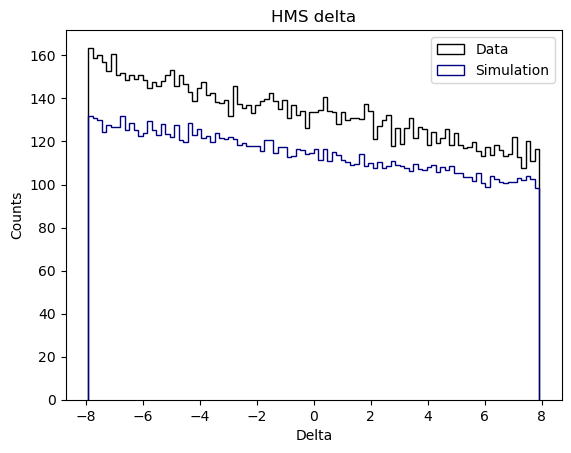

In [3]:
import scipy.interpolate
from scipy.interpolate import LinearNDInterpolator, CloughTocher2DInterpolator
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy 

# simroot = uproot.open("/Users/juliogutierrez/Downloads/hms_29p05deg_1p531_lh2_rsidis.root")
simroot = uproot.open("/Users/juliogutierrez/Downloads/R-sidis_analysis/ROOTfiles/hms_29p05deg_1p531gev_hyd_rsidis.root")
dataroot = uproot.open("/Users/juliogutierrez/Downloads/R-sidis_analysis/ROOTfiles/hms_coin_replay_production_24136_-1.root")


simtree = simroot["h10"]
tree = dataroot["T"]

psdelta = simtree["hsdelta"].array(library="np")
stop_id = simtree["stop_id"].array(library="np")
psytar = simtree["hsytar"].array(library="np")
psxptar = simtree["hsxptar"].array(library="np")
psyptar = simtree["hsyptar"].array(library="np")
sxpfp = simtree["hsxpfp"].array(library="np")
psypfp = simtree["hsypfp"].array(library="np")
sweights = simtree["weight"].array(library="np")

ptardp = tree["H.gtr.dp"].array(library="np")
xtar = tree["H.gtr.x"].array(library="np")
ytar = tree["H.gtr.y"].array(library="np")
ptarth = tree["H.gtr.th"].array(library="np")
ptarph = tree["H.gtr.ph"].array(library="np")
hmsCal = tree["H.cal.etottracknorm"].array(library="np")
xfp = tree["H.dc.x_fp"].array(library="np")
yfp = tree["H.dc.y_fp"].array(library="np")
xpfp = tree["H.dc.xp_fp"].array(library="np")
ypfp = tree["H.dc.yp_fp"].array(library="np")
Qtree = tree["H.kin.Q2"].array(library="np")
cer = tree["H.cer.npeSum"].array(library="np")

charge = 10.486769 # mC
# normfac = 6.4670859482710652
normfac = 19.72
hms_eff = 0.9986

xptar = np.tan(ptarth)
yptar = np.tan(ptarph)


nentries = len(psdelta)
nentries_data = len(ptardp)
print(nentries_data)


cuts_sim = (psdelta > -8) & (psdelta < 8) & (stop_id==0)
cuts_data = (ptardp > -8) & (ptardp < 8) & (hmsCal > 0.7)  & (cer > 2)
#& (xptar > -0.07) & (xptar < 0.07) & (yptar > -0.04) & (yptar < 0.07)

bin_counts_deltasim, bin_edges_deltasim = np.histogram(psdelta[cuts_sim], weights=normfac*sweights[cuts_sim], bins=100)
bin_counts_delta, bin_edges_delta = np.histogram(ptardp[cuts_data],bins=100)

bin_centers_sim = (bin_edges_deltasim[1:] + bin_edges_deltasim[:-1])/2
bin_centers = (bin_edges_delta[1:] + bin_edges_delta[:-1])/2

plt.hist(bin_centers, bins=len(bin_centers), histtype='step', weights=bin_counts_delta / (charge*hms_eff), color='black', label="Data");
plt.hist(bin_centers_sim, bins=len(bin_centers_sim), histtype='step', weights=bin_counts_deltasim, linestyle='-', color='navy', label="Simulation");
plt.title("HMS delta")
plt.xlabel("Delta")
plt.ylabel("Counts")
# plt.yscale('log')
plt.legend()